<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

In [2]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose"
os.chdir(folder_script)

In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [4]:
warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

<Figure size 768x576 with 0 Axes>

In [5]:
!apt install graphviz
import os
os.environ["PATH"] += os.pathsep + '/usr/bin/dot'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [6]:
ext_data=True

if ext_data==False:
  df_train=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv", index_col=0)
  df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv", index_col=0)

  df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
  df_test.shape

if ext_data==True:
  df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_final.csv", index_col=0)
  df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_final.csv", index_col=0)

  df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
  print(df_test.shape,df_train.shape)

(3644, 669) (177024, 670)


In [ ]:
target = 'bg+1:00'

trgt = df_train[target]
df_train.drop(columns=[target], inplace=True)

In [40]:
pr_0 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_dnn_v0_average_clipped.csv", index_col=0)
pr_1 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v4_average_clipped.csv", index_col=0)
pr_2 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v3_average_clipped.csv", index_col=0)
pr_3 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v0_average.csv", index_col=0)
pr_4 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v5_original.csv", index_col=0)
pr_5 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v4_selection.csv", index_col=0)
pr_6 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_xgbreg_v0_average.csv", index_col=0)
pr_7 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_xgbreg_v1_average_id.csv", index_col=0)


total = pd.concat([pr_0, pr_1, pr_2, pr_4, pr_6, pr_7], axis=1)

In [41]:
total["average"] = total.mean(axis=1)
total.sample(10)

,bg+1:00,bg+1:00,bg+1:00,bg+1:00,bg+1:00,bg+1:00,average
id,,,,,,,
p10_25615,9.410755,8.363668,8.051103,7.074007,7.916235,7.767768,8.097256
p01_8584,9.226889,8.762353,9.116967,8.948201,9.137778,9.286440,9.079771
p04_24763,5.053467,4.693501,4.850130,4.902075,5.267649,5.466560,5.038897
p01_8702,6.634787,3.862921,5.374088,5.440030,7.041657,7.000295,5.892296
p05_8449,6.725914,6.731175,7.268202,8.426122,6.905030,7.192947,7.208232
p01_8641,7.720469,7.275857,7.190135,7.315435,7.648640,7.898102,7.508106
p02_26091,8.896925,9.100314,8.969018,8.843737,9.041414,9.055746,8.984526
p18_47,7.924147,7.910767,8.352842,8.586846,7.956601,7.920409,8.108602
p05_8425,10.814445,10.502537,10.922403,9.762475,10.047442,10.341676,10.398496


In [42]:
total.columns = ["sub_00","sub_01","sub_02","sub_03","sub_04","sub_05","average"]

In [43]:
total.corr().style.background_gradient(cmap='coolwarm')

,sub_00,sub_01,sub_02,sub_03,sub_04,sub_05,average
sub_00,1.000000,0.945967,0.951930,0.907660,0.960795,0.956030,0.973202
sub_01,0.945967,1.000000,0.968822,0.934595,0.956799,0.955505,0.979897
sub_02,0.951930,0.968822,1.000000,0.947455,0.970917,0.970971,0.987897
sub_03,0.907660,0.934595,0.947455,1.000000,0.937212,0.936434,0.963119
sub_04,0.960795,0.956799,0.970917,0.937212,1.000000,0.996164,0.989380
sub_05,0.956030,0.955505,0.970971,0.936434,0.996164,1.000000,0.988180
average,0.973202,0.979897,0.987897,0.963119,0.989380,0.988180,1.000000


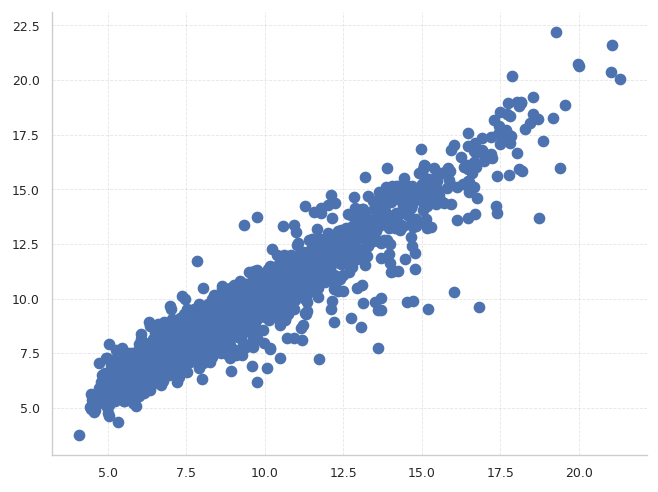

In [44]:
plt.scatter(total["sub_00"],total["sub_05"])

#### **STORE RESULTS**

In [45]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub

,id,bg+1:00
0,p01_8459,9.6
1,p01_8460,4.6
2,p01_8461,8.0
3,p01_8462,9.9
4,p01_8463,5.3
...,...,...
3639,p24_256,6.3
3640,p24_257,10.4
3641,p24_258,6.9
3642,p24_259,8.7


In [46]:
sub.sample()

,id,bg+1:00
3024,p21_78,9.4


In [47]:
sub["bg+1:00"] = total["average"].values
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_models_average_v1.csv", index=False)
print(sub.isna().sum())

id         0
bg+1:00    0
dtype: int64


In [48]:
sub.head()

,id,bg+1:00
0,p01_8459,8.950394
1,p01_8460,6.107708
2,p01_8461,6.866598
3,p01_8462,11.335135
4,p01_8463,6.918236
